In [1]:
import os
import numpy as np
import torch.nn as nn
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import torch.optim as optim
from torchvision.models import ResNet18_Weights
import torch.nn.functional as F
from PIL import Image

In [77]:
imagetotransform = 'Dataset/images/images/Rene_Magritte/Rene_Magritte_144.jpg'
transform_train = transforms.Compose([
    transforms.RandomCrop(size=224),
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.ToTensor(),  # Convert images to tensors  # take random crop of 224 by 224
    # Normalize pixel values using ImageNet dataset values
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
transformimage = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors  # take random crop of 224 by 224
    # Normalize pixel values using ImageNet dataset values
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
image = Image.open(imagetotransform)
originalimage = transformimage(image)
transformedimage = transform_train(image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


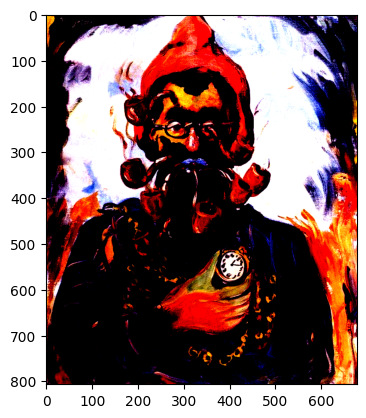

In [78]:
import matplotlib.pyplot as plt
#draw the image
plt.imshow(originalimage.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


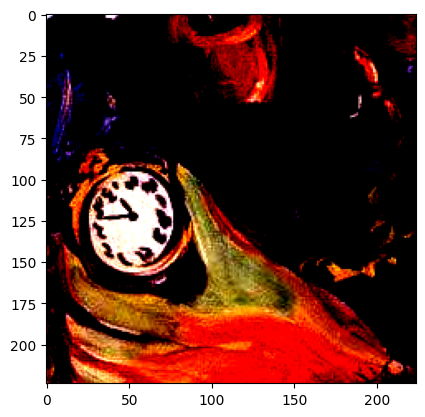

In [79]:
plt.imshow(transformedimage.permute(1,2,0))

In [80]:
model = models.resnet18()
model.fc=nn.Linear(model.fc.in_features,10)
state_dict = torch.load('BaseResnet.pth')
# print(state_dict)
model.load_state_dict(state_dict=state_dict)
model.eval()
output = model(transformedimage.unsqueeze(0))



In [81]:
softmax_output = F.softmax(output, dim=1)

# Get the top 3 predicted class probabilities and indices
top3_probabilities, top3_indices = torch.topk(softmax_output, k=3)

# Get the class labels corresponding to the top 3 predicted classes
class_labels = ['Michelangelo', 'Pablo_Picasso', 'Paul_Gauguin', 'Peter_Paul_Rubens', 'Piet_Mondrian', 'Raphael', 'Rene_Magritte', 'Sandro_Botticelli', 'Vincent_van_Gogh', 'William_Turner']

# Get the predicted class names
top3_class_names = [class_labels[idx] for idx in top3_indices.squeeze().tolist()]

print("Top 3 Predicted Classes:")
for class_name, probability in zip(top3_class_names, top3_probabilities.squeeze().tolist()):
    print(f"Class: {class_name}, Probability: {probability:.4f}")


Top 3 Predicted Classes:
Class: Vincent_van_Gogh, Probability: 0.4656
Class: Pablo_Picasso, Probability: 0.4461
Class: Rene_Magritte, Probability: 0.0341
